# Project 3: Classification with Logistic Regression and SVM

Before we start, please put your name and CUID in following format

: Firstname LASTNAME, #00000000   //   e.g. Nianyi LI, #12345678

**Your Answer:**   
Jack CARSON, #53602298

# General Rules of the Project Submission

Python 3 and [Matplotlib](https://matplotlib.org/) will be used throughout the semseter, so it is important to be familiar with them. It is strongly suggested to go through [Stanford CS231n](http://cs231n.github.io/python-numpy-tutorial/) and [CS228](https://github.com/kuleshov/cs228-material/blob/master/tutorials/python/cs228-python-tutorial.ipynb) for more detailed Python and numpy tutorials if you haven't had used Python before. 

In some cells and files you will see code blocks that look like this:

```python
##############################################################################
#                    TODO: Write the equation for a line                     #
##############################################################################
pass
##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################
```

You should replace the `pass` statement with your own code and leave the blocks intact, like this:

```python
##############################################################################
#                    TODO: Write the equation for a line                     #
##############################################################################
y = m * x + b
##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################
```

When completing the notebook, please adhere to the following rules:
- Do not write or modify any code outside of code blocks
- Follow the instruction of the project description carefully
- Run all cells before submitting. <span style="color:red">**You will only get credit for code that has been run!**.</span>

The last point is extremely important and bears repeating:

### We will not re-run your notebook -- <span style="color:red">you will only get credit for cells that have been run</span>

### File name
Your Python program should be named **yourlastname_yourfirstname_P3.ipynb**, then zip it and upload to Canvas

# Project Description

For this project we will apply both **Logistic Regression** and **SVM** to predict whether capacitors from a fabrication plant pass quality control based (QC) on two different tests. To train your system and determine its reliability you have a set of 118 examples. The plot of these examples is show below where a red x is a capacitor that failed QC and the green circles represent capacitors that passed QC.

<div>
<img src="https://nianyil.people.clemson.edu/CPSC_4430/P3_new.png" width="500"/>
</div>


## Data File

Two text files with the data is available on Canvas: a training set of 85 examples and a test set of 33 examples. Both are formatted as
- First line: **m** and **n**, tab separated
- Each line after that has two real numbers representing the results of the two tests, followed by a *1.0* if the capacitor *passed* QC and a *0.0* if it *failed* QC—tab separated.

You need to write a code to read data from the file. You **can** use packages, such as **panda**, to load the data.


In [1]:
##############################################################################
#         TODO: Write the code for reading data from file                    #
##############################################################################
test = open('P3test.txt', 'r')
train = open('P3train.txt', 'r')

test_data = []
test.readline() # skip the first line
for line in test:
    test_data.append(line.split())
    test_data[-1] = [float(i) for i in test_data[-1]] # convert to float    

train_data = []
train.readline()
for line in train:
    train_data.append(line.split())
    train_data[-1] = [float(i) for i in train_data[-1]] 
##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

Your assignment is to use what you have learned from the class slides and homework to create (**from scratch in Python**, not by using Logistic Regression library function!) a **Logistic Regression** and **SVM** binary classifier to predict whether each capacitor in the test set will pass QC. 

## Logistic Regression

You are free to use any model variation and any testing or training approach we have discussed for logistic regression. In particular, since this data is not linear, I assume you will want to add new features based on power of the original two features to create a good decision boundary. $w_0 + w_1x_1 + w_2x_2$ is not going to work!
One choice might be
- $\textbf{w}^T \textbf{x} = w_0 + w_1x_1 + w_2x_2 + w_3x_3 + w_4x_4 + w_5x_5 +w_6x_6 + w_7x_7 + w_8x_8$    where the new features are created as follows:

| New Features |From Original Features |
| --- | --- |
|$x_1$	| $x_1$|
|$x_2$	| $x_1^2$|
|$x_3$	| $x_2$||
|$x_4$	| $x_1x_2$|
|$x_5$	| $x_1x_2^2$|
|$x_6$	| $x_2^2$|
|$x_7$	| $x_1^2x_2$|
|$x_8$	| $x_1^2x_2^2$|

Note that it is easy to create a small Python program that reads in your  original features, uses a nested loop to create the new features and then writes them to a file:

```python
thePower = 2
for j in range(thePower+1): 
    for i in range(thePower+1):
        temp = (x1**i)*(x2**j)
        if (temp != 1):
            fout1.write(str(temp)+"\t") fout1.write(str(y)+"\n")
```

With a few additions to the code, you can make a program to create combinations of any powers of $x_1$ and $x_2$!

In [2]:
##############################################################################
#           TODO: Define the Logistic regression models                      #
##############################################################################
import numpy as np

X = np.array(train_data)[:, 0:2] # Put first two columns of train_data into X
Y = np.array(train_data)[:, 2] # Put third column of train_data into Y

X1 = X[:, 0]
X2 = X[:, 1]
X3 = X1 ** 2
X4 = X2 ** 2
X5 = X1 * X2
X6 = X1 ** 2 * X2
X7 = X1 * X2 ** 2
X8 = X1 ** 2 * X2 ** 2
X9 = X1 ** 4
X10 = X2 ** 4 # Using features with powers of 2 and 4 for circular data

# Combine the features into a single array
X = np.c_[X1, X2, X3, X4, X5, X6, X7, X8, X9, X10]
##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

## Optimization using Gradient Decent

Once you have defined the logistic regression model, you need to find the weights using the Gradient Decent algorithm. You need to implement the Vanilla Gradient Decent from scratch in Python.

You need to specify the hyperparameters of GD, and plot the training loss curve (**J-curve**). The loss function should be the binary cross-entropy loss function that we introduced.

In [3]:
##############################################################################
#           TODO: Implement the Gradient Decent Algorithm                    #
##############################################################################
epoch_num = 150000
lr = 0.015
w = np.zeros(X.shape[1])
J = np.array([])

def sigmoid(z): # sigmoid function
    return 1 / (1 + np.exp(-z)) 

def cross_entropy_loss(y_pred,y): # logistic loss function
    J = np.mean(-y*np.log(y_pred) - (1-y)*np.log(1-y_pred))
    return J

def gradient_func(X, y, y_pred): # gradient function
    gradient_value = np.dot(X.T, (y_pred - y)) / len(y)
    return gradient_value

def Vanilla_GD(epoch_num, lr, w, J, X, Y):
    for epoch in range(epoch_num):
        z = np.dot(X, w) # Xw^T
        y_pred = sigmoid(z) # sigmoid(Xw^T)
        J = np.append(J, cross_entropy_loss(y_pred, Y)) # Loss for epoch
        gradient = gradient_func(X, Y, y_pred) # gradient for epoch
        w -= lr * gradient # update w
    return w, J

w, J = Vanilla_GD(epoch_num, lr, w, J, X, Y) # get w and J
##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

Next, print out the final weights and plot the **J-curve/Loss curve** of training. 

[  1.02873297   2.45616649   3.34398268   3.55658097  -4.19551048
  -3.77172767   0.49352292  -8.46600028 -10.04276666  -8.50961633]


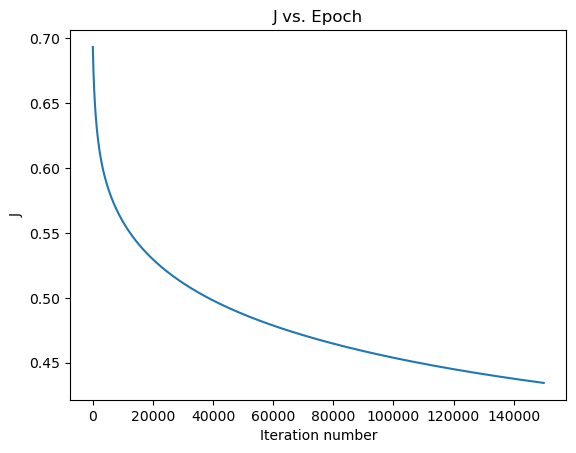

In [4]:
##############################################################################
#                     TODO: Plot the J curve                                 #
##############################################################################
import matplotlib.pyplot as plt
print(w)

plt.plot(range(epoch_num), J)
plt.xlabel('Iteration number')
plt.ylabel('J')
plt.title('J vs. Epoch')
plt.show()
##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

Based on your data and plot, you should then briefly discuss how you can ensure that the model is well trained.

**Your Answer:**  

Plotting the training data along vs. decision boundary using our trained model shows us that our model has identified an area where capacitors are passing QA on the training data, there still seems to be room for improvement on the training data, however we must be careful not to overfit this model.

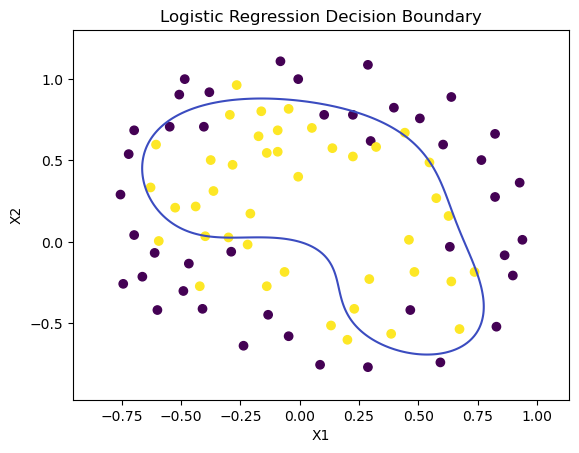

In [5]:
x1_min, x1_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2
x2_min, x2_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2

h = 0.01
xx, yy = np.meshgrid(np.arange(x1_min, x1_max, h),
                     np.arange(x2_min, x2_max, h))

# Create a matrix with the values of the features for each point in the meshgrid
grid = np.c_[xx.ravel(), yy.ravel(), xx.ravel()**2, yy.ravel()**2,
             xx.ravel()*yy.ravel(), xx.ravel()**2*yy.ravel(), 
             xx.ravel()*yy.ravel()**2, xx.ravel()**2*yy.ravel()**2,
             xx.ravel()**4, yy.ravel()**4]

# Predict the class labels for the points in the meshgrid using the logistic regression model
Z = sigmoid(np.dot(grid, w))
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contour(xx, yy, Z, levels=[0.5], cmap=plt.cm.coolwarm)
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Logistic Regression Decision Boundary')
plt.show()

## Model Evaluation

Evaluate the performance on testing set:
- Print out the confusion matrix
- Calculate and print out the *accuracy*, *precision*, *recall*, and *F1* value of your model

**Note that:**
- For **undergrads** *(CPSC 4430)* the final accuracy of both algorithms on your test set should be higher than  <span style="color:red">**70%**</span>
- For **graduate-level** *(CPSC 6430)* the final accuracy of both algorithms on your test set should be higher than  <span style="color:red">**85%**</span>


In [6]:
##############################################################################
#                           TODO: Model Evaluation                           #
##############################################################################
X_test = np.array(test_data)[:, 0:2] # Get test features

X1 = X_test[:, 0]
X2 = X_test[:, 1]
X3 = X1 ** 2
X4 = X2 ** 2
X5 = X1 * X2
X6 = X1 ** 2 * X2
X7 = X1 * X2 ** 2
X8 = X1 ** 2 * X2 ** 2
X9 = X1 ** 4
X10 = X2 ** 4

X_test = np.c_[X1, X2, X3, X4, X5, X6, X7, X8, X9, X10]
Y_test = np.array(test_data)[:, 2] 

z_test = np.dot(X_test, w) # Add weights to test features
y_pred_test = sigmoid(z_test) # Get predictions
y_pred_test = np.round(y_pred_test) # Round predictions to 0 or 1

from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, y_pred_test)) 

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("\nACCURACY:", accuracy_score(Y_test, y_pred_test), ':)\n')

print("Precision:", precision_score(Y_test, y_pred_test))
print("Recall:", recall_score(Y_test, y_pred_test))
print("F1 Score:", f1_score(Y_test, y_pred_test))
##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

[[14  3]
 [ 6 10]]

ACCURACY: 0.7272727272727273 :)

Precision: 0.7692307692307693
Recall: 0.625
F1 Score: 0.6896551724137931


## Support Vector Machine (SVM)

In this part, you need to use the previous training and testing data file. 

You are **allowed** to use the svm functions in the **Scikit-learn** library and don’t need to implement the algorithm from scratch.

- You need to try at least **three** different kernel functions of SVM, and pick the **best** model.
- You need to print out the final weights got from your best SVM model.

**Note that:**
- For **undergrads** *(CPSC 4430)* the final accuracy of both algorithms on your test set should be higher than  <span style="color:red">**70%**</span>
- For **graduate-level** *(CPSC 6430)* the final accuracy of both algorithms on your test set should be higher than  <span style="color:red">**85%**</span>

In [7]:
##############################################################################
#                      TODO: Classfication using SVM                         #
##############################################################################
from sklearn import svm

train_data = np.loadtxt('P3train.txt', skiprows=1)
test_data = np.loadtxt('P3test.txt', skiprows=1)

# Split data into features and labels
X_train, y_train = train_data[:, :-1], train_data[:, -1]
X_test, y_test = test_data[:, :-1], test_data[:, -1]

kernels = ['linear', 'sigmoid', 'poly', 'rbf']
for kernel in kernels:
    model = svm.SVC(kernel=kernel)
    model.fit(X_train, y_train)
    weights = model.dual_coef_
    weights = [w for w in weights[0] if abs(w) != 1]
    print(f"Kernel: {kernel}, Accuracy: {model.score(X_test, y_test)}")
    print(f"Weights: {weights}\n")

# The RBF kernel performs the best with an accuracy of 0.848 on the test set
##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

Kernel: linear, Accuracy: 0.45454545454545453
Weights: [-0.6727956269973179, -0.3272043730026821]

Kernel: sigmoid, Accuracy: 0.48484848484848486
Weights: [-0.49282240184041504, 0.49282240184041504]

Kernel: poly, Accuracy: 0.6666666666666666
Weights: [-0.711526520917246, -0.5790334100245921, -0.8528619024766817, -0.40358355200419116, 0.5470053854227105]

Kernel: rbf, Accuracy: 0.8484848484848485
Weights: [-0.5508173125563783, -0.3786228048448028, -0.8599429633936366, -0.7521121911360739, -0.6192629910150796, -0.10057295825506905, 0.16583191214435522, 0.0954993090566853]



## Visualize Decision Boundary and Model Comparision

You need to plot the decision boundary of Logistic Regression and SVM that you previously trained separately. 

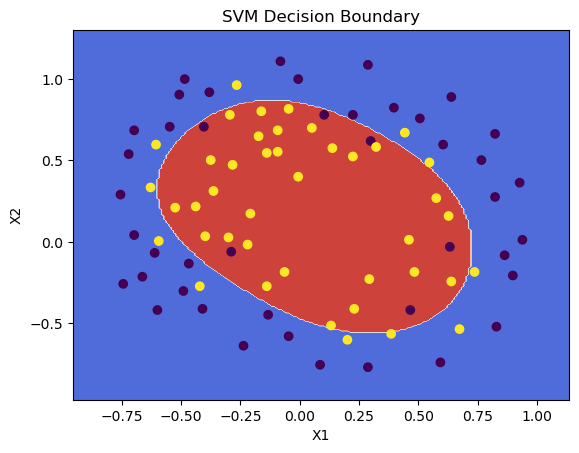

In [8]:
##############################################################################
#                   TODO: Plot the Decision Boundary                         #
##############################################################################
x_min, x_max = X_train[:, 0].min() - 0.2, X_train[:, 0].max() + 0.2
y_min, y_max = X_train[:, 1].min() - 0.2, X_train[:, 1].max() + 0.2

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('SVM Decision Boundary')
plt.show()
##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

Based on your data and plot, you should then briefly discuss which one has better performance and why.

**Your Answer:**  

It seems that SVM performs better on classifying the data compared to the logistic model. 
This may be due to the SVMs margin-based approach to find the decision boundary, which aims to 
maximize the distance between the decision boundary and the closest data points from each class. 
This allows SVMs to be more accurate on this noisy circular data, and also allows it to generalize (prevents overfitting) better than the logistic model.